In [1]:
using CUDA
using Plots
include("Operations.jl")
using BenchmarkTools

In [2]:
CUDA.allowscalar(false)

In [3]:
const nx = 41
const dx = 2 / (nx-1)
const nt = 25
const dt = 0.025
const c = 1

1

In [4]:
u = CuArray{Float64}(undef , nx);
u = CUDA.ones(nx)

41-element CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [5]:
CUDA.allowscalar() do

    for i in range(Int(round(nx/3)), stop=Int(round(2*nx/3)))

        u[i] = 2;

    end

end

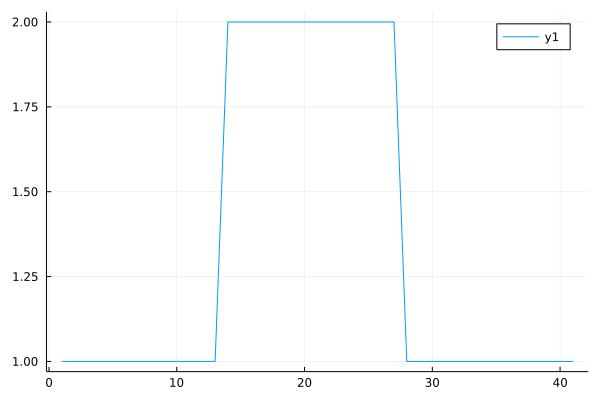

In [6]:
up = Array(u) 

pb = plot(up)

In [7]:
u_new = CuArray{Float64}(undef, nx-1)

for j in range(1, stop=nt)
    uf = u[1:nx-1]
    ub = u[2:nx]

    @cuda threads=40 kernel_step_1!(u_new, uf, ub, c, dt, dx)
    synchronize()

    u[2:nx] = u_new
end

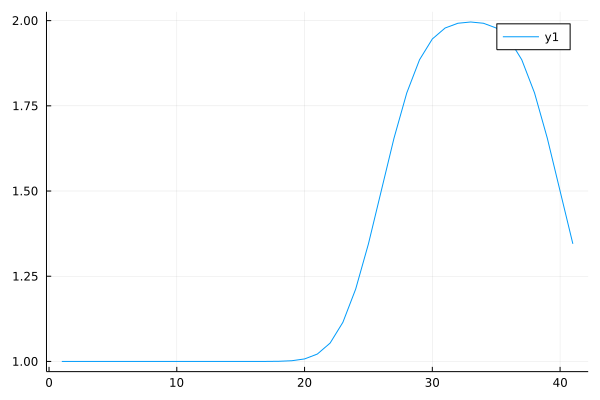

In [8]:
up = Array(u)

pa = plot(up)

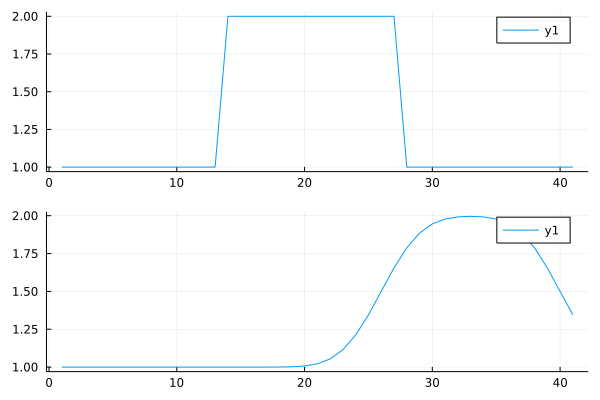

In [9]:
plot(pb, pa, layout=(2,1))